In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("idawoodjee/predict-the-positions-and-speeds-of-600-satellites")

print("Path to dataset files:", path)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Path to dataset files: /kaggle/input/predict-the-positions-and-speeds-of-600-satellites
/kaggle/input/predict-the-positions-and-speeds-of-600-satellites/jan_train.csv
/kaggle/input/predict-the-positions-and-speeds-of-600-satellites/answer_key.csv
/kaggle/input/predict-the-positions-and-speeds-of-600-satellites/jan_test.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Read the data
X_train = pd.read_csv('/kaggle/input/predict-the-positions-and-speeds-of-600-satellites/jan_train.csv')
X_test = pd.read_csv('/kaggle/input/predict-the-positions-and-speeds-of-600-satellites/jan_test.csv')
y_test = pd.read_csv('/kaggle/input/predict-the-positions-and-speeds-of-600-satellites/answer_key.csv')
print(y_test.head())

target_columns = ['x', 'y', 'z', 'Vx', 'Vy', 'Vz']

# Separate features and targets in the training set
X_train_actual = X_train.drop(columns=target_columns)  # Features in training set
y_train = X_train[target_columns]              # Targets in training set



             x             y             z        Vx        Vy        Vz
0  7532.838464  28142.427773  16447.206347 -1.339892  1.066093 -3.122314
1  3496.786213  29816.542717   7091.835310 -1.524733  0.078967 -3.516343
2  -892.277257  28322.345197  -2974.463116 -1.577600 -1.184553 -3.597230
3 -5140.552632  23053.303054 -12593.864902 -1.410630 -2.571412 -3.167409
4 -8552.378514  14123.938571 -20166.609401 -0.983303 -3.724114 -2.145066


In [3]:
#Data preprocessing

#Check for missing values
missing_value_count_by_column = (X_train_actual.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column > 0])

missing_value_count_by_column = (X_test.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column > 0])

#There are no missing values in the train and test sets

Series([], dtype: int64)
Series([], dtype: int64)


In [4]:
import pandas as pd
#find categorical variables
s = (X_train_actual.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables")
print(object_cols)

#Find unique values within 'epoch'
unique_count_epoch = X_train_actual['epoch'].unique()
print(f"unique count epoch: {unique_count_epoch}")
print(X_train['epoch'].dtype)

#Seperating date and time from epoch
X_train_actual['epoch'] = pd.to_datetime(X_train_actual['epoch'])
X_test['epoch'] = pd.to_datetime(X_test['epoch'])
# Separate into date and time columns 
X_train_actual['date'] = X_train_actual['epoch'].dt.date  # Extract date
X_train_actual['time'] = X_train_actual['epoch'].dt.time  # Extract time

X_test['date'] = X_test['epoch'].dt.date  # Extract date
X_test['time'] = X_test['epoch'].dt.time  # Extract time

#encode date and time values to numerical values training data
X_train_actual['time_numeric']=X_train_actual['time'].apply(lambda x: pd.to_timedelta(x)
                                             .total_seconds() if isinstance
                                             (x, str) else x.hour*3600 + x.minute*60 
                                             + x.second)
X_train_actual['date_numeric'] = pd.to_datetime(X_train_actual['date']).map(lambda x: x.toordinal())

X_test['time_numeric']=X_test['time'].apply(lambda x: pd.to_timedelta(x)
                                             .total_seconds() if isinstance
                                             (x, str) else x.hour*3600 + x.minute*60 
                                             + x.second)
X_test['date_numeric'] = pd.to_datetime(X_test['date']).map(lambda x: x.toordinal())

X_train_actual = X_train_actual.drop(columns=['epoch','date', 'time'])
X_test = X_test.drop(columns=['epoch','date', 'time'])                                              
#creating backup
backup_X_train_actual = X_train.copy()
backup_X_test = X_test.copy()

print(X_train_actual.head())
print(X_test.head())







Categorical variables
['epoch']
unique count epoch: ['2014-01-01 00:00:00.000' '2014-01-01 00:46:43.000'
 '2014-01-01 01:33:26.001' ... '2014-01-24 23:08:15.645'
 '2014-01-24 23:33:06.283' '2014-01-24 23:57:56.920']
object
   id  sat_id         x_sim         y_sim         z_sim    Vx_sim    Vy_sim  \
0   0       0  -8843.131454  13138.221690 -20741.615306 -0.907527 -3.804930   
1   1       0 -10555.500066   1649.289367 -24473.089556 -0.303704 -4.269816   
2   2       0 -10571.858472 -10145.939908 -24271.169776  0.274880 -4.046788   
3   3       0  -9149.620794 -20618.200201 -20765.019094  0.712437 -3.375202   
4   4       0  -6729.358857 -28902.271436 -14992.399986  0.989382 -2.522618   

     Vz_sim  time_numeric  date_numeric  
0 -2.024133             0        735234  
1 -0.616468          2803        735234  
2  0.718768          5606        735234  
3  1.718306          8409        735234  
4  2.342237         11212        735234  
    id  sat_id         x_sim         y_sim        

Mutual Information with x:
x_sim           2.921995
id              1.843982
y_sim           1.723714
Vy_sim          1.704096
z_sim           1.665177
Vz_sim          1.606220
Vx_sim          1.601501
sat_id          1.416345
date_numeric    0.029175
time_numeric    0.000000
dtype: float64
----------------------------------------
Mutual Information with y:
y_sim           2.919476
id              1.847460
x_sim           1.742216
Vx_sim          1.729701
z_sim           1.701300
Vz_sim          1.611030
Vy_sim          1.590456
sat_id          1.414400
date_numeric    0.028961
time_numeric    0.000000
dtype: float64
----------------------------------------
Mutual Information with z:
z_sim           3.050361
id              1.902899
x_sim           1.754529
y_sim           1.735009
Vx_sim          1.620754
Vy_sim          1.602534
sat_id          1.533662
Vz_sim          1.531366
date_numeric    0.035538
time_numeric    0.000000
dtype: float64
----------------------------------------
M

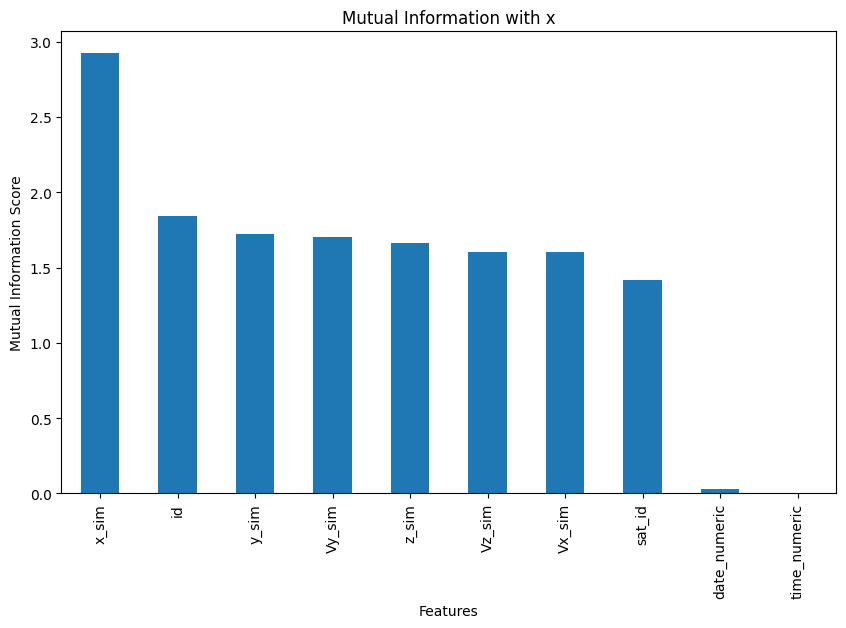

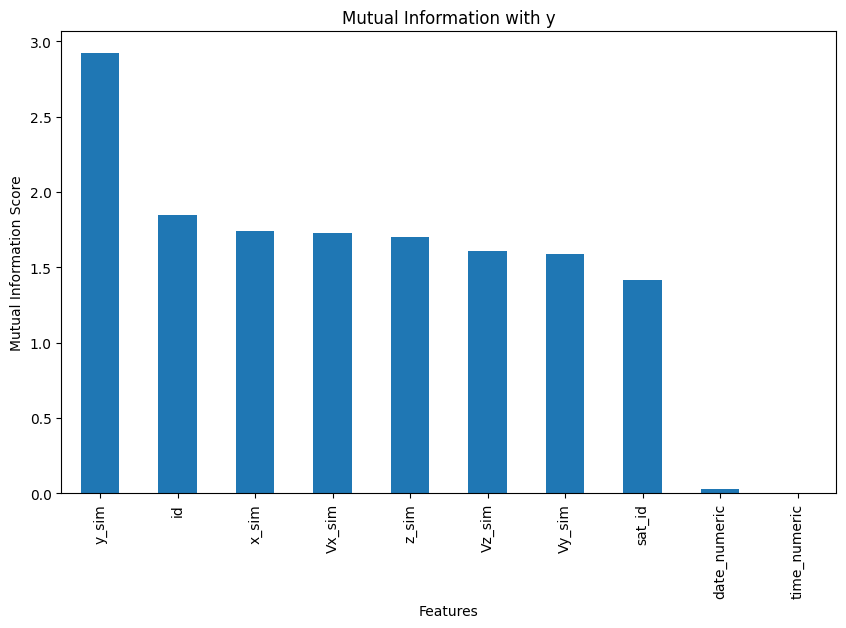

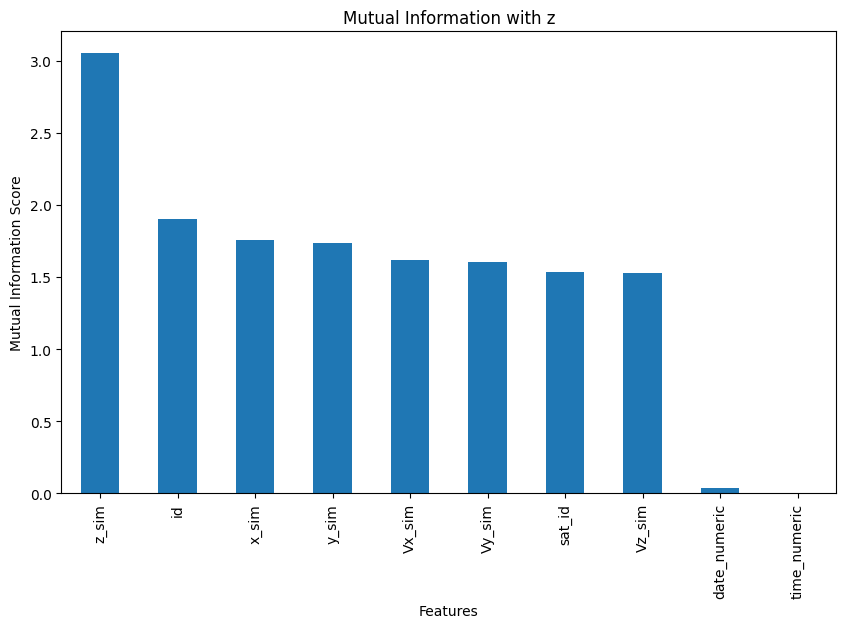

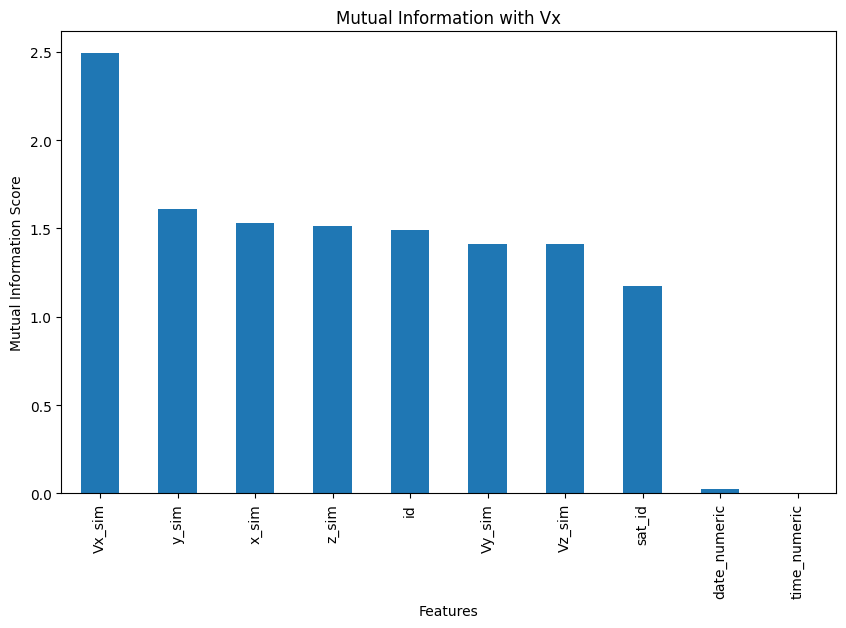

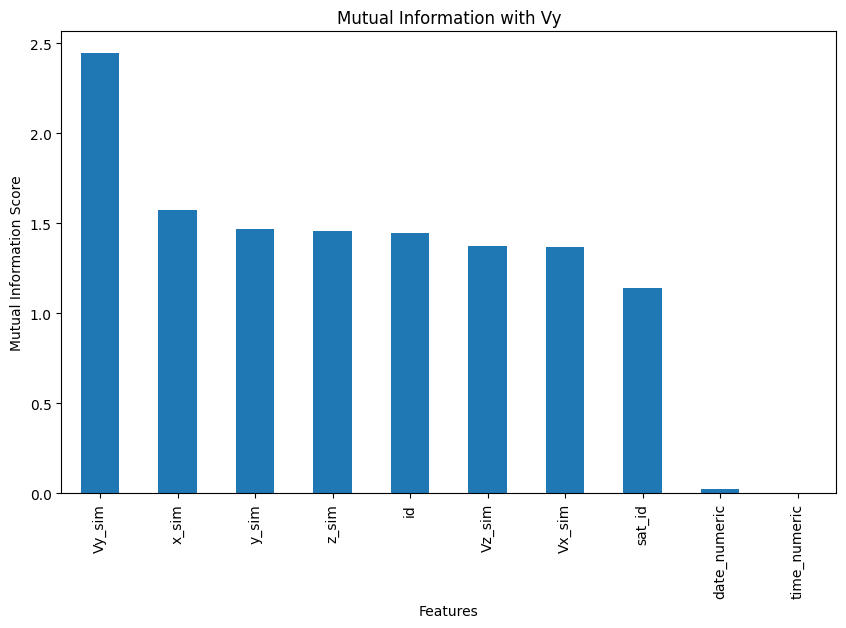

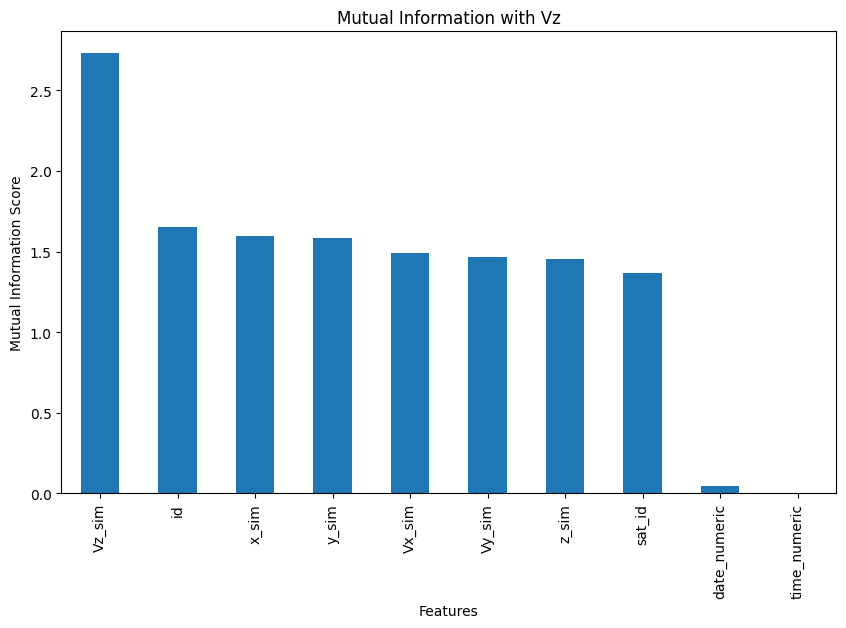

In [8]:
#looking for MI scores
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

mutual_info_scores = {}
for target in target_columns:
    mi_scores = mutual_info_regression(X_train_actual, y_train[target])
    mutual_info_scores[target]=pd.Series(mi_scores, index=X_train_actual.columns)

for target, scores in mutual_info_scores.items():
    print(f"Mutual Information with {target}:")
    print(scores.sort_values(ascending=False))
    print("-"*40)

import matplotlib.pyplot as plt
for target, scores in mutual_info_scores.items():
    scores.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
    plt.title(f"Mutual Information with {target}")
    plt.xlabel("Features")
    plt.ylabel("Mutual Information Score")
    plt.show()

In [6]:
#understood that date_numeric and time_numeric have very low MI_scores
X_train_actual = X_train_actual.drop(columns=['date_numeric','time_numeric'])
X_test = X_test.drop(columns=['date_numeric','time_numeric']) 
print(X_train_actual.head())
print(X_test.head())

   id  sat_id         x_sim         y_sim         z_sim    Vx_sim    Vy_sim  \
0   0       0  -8843.131454  13138.221690 -20741.615306 -0.907527 -3.804930   
1   1       0 -10555.500066   1649.289367 -24473.089556 -0.303704 -4.269816   
2   2       0 -10571.858472 -10145.939908 -24271.169776  0.274880 -4.046788   
3   3       0  -9149.620794 -20618.200201 -20765.019094  0.712437 -3.375202   
4   4       0  -6729.358857 -28902.271436 -14992.399986  0.989382 -2.522618   

     Vz_sim  
0 -2.024133  
1 -0.616468  
2  0.718768  
3  1.718306  
4  2.342237  
    id  sat_id         x_sim         y_sim         z_sim    Vx_sim    Vy_sim  \
0  741       0   3055.948713  29823.972025   6085.227438 -1.534768 -0.036194   
1  742       0  -1337.714907  27971.442402  -4000.795465 -1.569222 -1.322302   
2  743       0  -5527.554990  22314.456814 -13492.029333 -1.376563 -2.703735   
3  744       0  -8809.978734  13072.425457 -20770.687399 -0.926840 -3.807767   
4  745       0 -10576.656721   1580.09504

In [6]:
#defining the model
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Downcast data types
X_train_actual = X_train_actual.astype('float32')
y_train = y_train.astype('float32')

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=12,  # Fewer iterations
    cv=7,       # Fewer folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit on a smaller dataset subset
X_train_sampled = X_train_actual.sample(frac=0.5, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

random_search.fit(X_train_sampled, y_train_sampled)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
#Output best parameters
print(f"Best Parameters: {best_params}")

# Validate the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train_sampled, best_model.predict(X_train_sampled))  # R² score on training set
mae_train = mean_absolute_error(y_train_sampled, best_model.predict(X_train_sampled))  # MAE on training set
# Evaluate the model
r2_test = r2_score(y_test, y_pred)  # R² score on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE on test set
mae_test = mean_absolute_error(y_test, y_pred)  # Use y_test_pred
# Output evaluation metrics
print(f"R² score on training set: {r2_train}")
print(f"Mean Absolute Error on training set: {mae_train}")
print(f"R² score on test set: {r2_test}")
print(f'Root Mean Squared Error (RMSE) on test set: {rmse_test}')
print(f"Mean Absolute Error on test set: {mae_test}")

# Predictions on test set (output)
print("Predictions on test set:")
print(y_pred)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
R² score on training set: 0.9782429338237613
Mean Absolute Error on training set: 140.76300258091433
R² score on test set: 0.872794880710587
Root Mean Squared Error (RMSE) on test set: 3649.22083114595
Mean Absolute Error on test set: 1110.4222626297246
Predictions on test set:
[[ 7.55419408e+03  2.78730995e+04  1.57287509e+04 -1.42692279e+00
   1.06688361e+00 -3.01099582e+00]
 [ 3.40487567e+03  2.97974576e+04  6.82901473e+03 -1.47362047e+00
   7.25144156e-02 -3.45988549e+00]
 [-2.11988512e+03  2.69283413e+04 -4.69549424e+03 -1.31356026e+00
  -9.28633390e-01 -2.92299295e+00]
 ...
 [-2.33766135e+04 -4.17717256e+03  4.52500815e+03  1.89020702e-01
   3.25253970e+00 -1.76552769e-01]
 [-2.02457684e+04  2.92448634e+03  4.81337975e+03  9.99306170e-02
   2.15766494e+00 -2.81001605e-01]
 [-2.00433989e+04  7.79301592e+03  3.40564991e+03  1.79327168e+00
   2.89795165e+00 -4.66529419e-01]]


R² score on training set: 0.999545580622994
Mean Absolute Error on training set: 49.66895165151241
R² score on test set: 0.9005012958598894
Root Mean Squared Error (RMSE) on test set: 3066.636582462229
Predictions on test set:
[[ 7.50012622e+03  2.81656295e+04  1.63956122e+04 -1.34152116e+00
   1.06028426e+00 -3.12506990e+00]
 [ 3.45206858e+03  2.98219091e+04  7.02087997e+03 -1.52555535e+00
   6.97446396e-02 -3.51807088e+00]
 [-9.21811589e+02  2.83072901e+04 -3.02204189e+03 -1.57695570e+00
  -1.19170427e+00 -3.59636935e+00]
 ...
 [-2.35150133e+04 -4.03154330e+03  4.84957894e+03  9.30916260e-02
   3.81761731e+00 -3.14686876e-01]
 [-2.17492619e+04  2.23067968e+03  4.69507636e+03  8.04234230e-01
   3.31738337e+00 -6.05976354e-01]
 [-1.96789424e+04  7.80637089e+03  3.18076328e+03  2.38316398e+00
   3.73106376e+00 -7.24622822e-01]]

Animation saved as metrics_animation.mp4


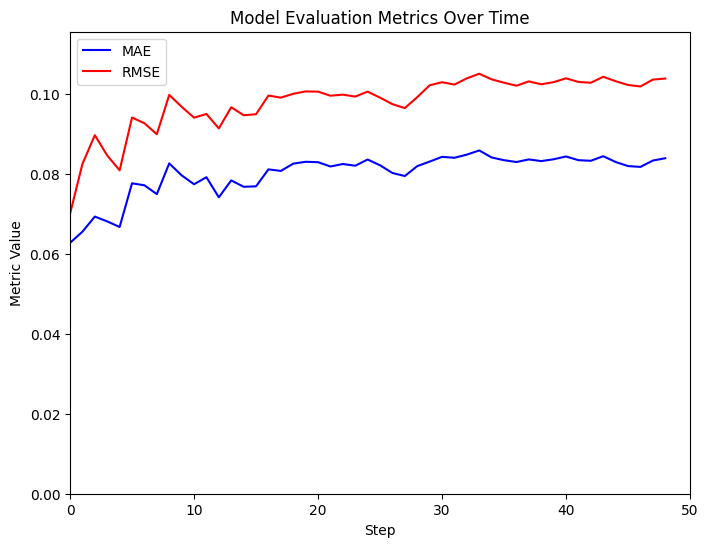

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate sample data for illustration
n_steps = 50
y_test = np.random.randn(n_steps, 3)  # Simulated actual positions
y_pred = y_test + np.random.normal(0, 0.1, size=y_test.shape)  # Simulated predictions

mae_values = []
rmse_values = []

for i in range(n_steps):
    mae = mean_absolute_error(y_test[:i+1], y_pred[:i+1])
    rmse = np.sqrt(mean_squared_error(y_test[:i+1], y_pred[:i+1]))
    mae_values.append(mae)
    rmse_values.append(rmse)

fig, ax = plt.subplots(figsize=(8, 6))

line1, = ax.plot([], [], 'b-', label="MAE")
line2, = ax.plot([], [], 'r-', label="RMSE")
ax.set_xlim(0, n_steps)
ax.set_ylim(0, max(np.max(mae_values), np.max(rmse_values)) * 1.1)
ax.set_xlabel('Step')
ax.set_ylabel('Metric Value')
ax.set_title('Model Evaluation Metrics Over Time')
ax.legend()

def update(frame):
    line1.set_data(np.arange(frame), mae_values[:frame])
    line2.set_data(np.arange(frame), rmse_values[:frame])
    return line1, line2

ani = animation.FuncAnimation(fig, update, frames=n_steps, interval=100, blit=True)

# Save animation as an MP4 file
ani.save('/kaggle/working/metrics_animation.mp4', writer='ffmpeg', fps=30)
print("Animation saved as metrics_animation.mp4")


In [10]:
from IPython.display import FileLink

# Verify the file exists
import os
file_path = '/kaggle/working/metrics_animation.mp4'

if os.path.exists(file_path):
    print("File exists. Generating download link...")
    display(FileLink(file_path))
else:
    print("File not found. Ensure the animation has been saved correctly.")


File exists. Generating download link...


/kaggle/working/metrics_animation.mp4

In [11]:
ani.save('/kaggle/output/metrics_animation.mp4', writer='ffmpeg', fps=30)
print("Animation saved in the /kaggle/output directory.")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/output'